# 6.1.1 One-hot encoding of words and characters

<img src="screenshots/Screen Shot 2019-08-03 at 12.15.49.png">

Deep Learningでbag-of-wordsを使わない理由：
1.Because bag-of-words isn't an order-preserving tokenization method (the tokens generated are understood as a set, not a sequence, and the general structure of the sentences is lost), it tends to be used in shallow language-processing models rather than in deep-learning models.
2.One-dimensional convnets and recurrent neural networks are capable of learning representations for groups of words and characters without being explicitly told about the existence of such groups, by looking at continuous word or character sequences.

6.3 Using Keras for word-level one-hot encoding

In [1]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [2]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [3]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [4]:
one_hot_results.shape

(2, 1000)

In [5]:
word_index

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homework': 9}

<img src="screenshots/Screen Shot 2019-08-03 at 12.31.46.png">
one-hotとword-embeddingのベクトルサイズ

# 6.1.2 Using word embeddings

The Embedding layer is best understood as a dictionary that maps integer indices (which stand for specific words) to dense vectors.
図：Word embedding、可視化のため、2次元にしている。one-hotの単語間の距離は常にsqrt(2)です。word-embeddingの単語の関連性は距離からわかる。(Deep Learning Figure 12.3 p452)
<img src="screenshots/Screen Shot 2019-08-03 at 12.24.54.png">

## Learning word embeddings with the Embedding layer
6.6 Loading the IMDB data for use with an Embedding layer

In [1]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 13s 1us/step


In [2]:
x_train.shape

(25000,)

imdbについての説明：https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification

In [8]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [9]:
x_train.shape

(25000, 20)

defaultはpre-paddingなので、各サンプルの最後の20個数字を取っている。

In [11]:
x_train[0]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32], dtype=int32)

6.7 Using an Embedding layer and classifier on the IMDB data.
Embedding関数の引数について、
10000はinput_dim, size of vocabulary, imdbの例で10000最頻値の単語しか撮らないので、10000になっている。これもone-hotのlength。
8はoutput_dim, embeddingのサイズ。embeddingする前、一つの単語を表すために、10000サイズのone-hotが必要。embeddingした後、一つの単語を8サイズのvectorで表せる。

In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


Embeddingを使わないと、インプットのサイズは25000\*20\*10000です。元々の25000\*20のデータは、NeuralNetworkは処理できないので、one-hotで3次元tensorに変換しないといけない。Embeddingを使ったら、一つのwordが8個数字で表示できる。

In [13]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 76us/step - loss: 0.6759 - acc: 0.6042 - val_loss: 0.6398 - val_acc: 0.6806
Epoch 2/10
20000/20000 [==============================] - 1s 71us/step - loss: 0.5658 - acc: 0.7428 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 1s 60us/step - loss: 0.4752 - acc: 0.7807 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 1s 58us/step - loss: 0.4264 - acc: 0.8078 - val_loss: 0.5008 - val_acc: 0.7454
Epoch 5/10
20000/20000 [==============================] - 1s 58us/step - loss: 0.3931 - acc: 0.8257 - val_loss: 0.4981 - val_acc: 0.7540
Epoch 6/10
20000/20000 [==============================] - 1s 70us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5013 - val_acc: 0.7532
Epoch 7/10
20000/20000 [==============================] - 1s 62us/step - loss: 0.

ページ187メモ：Note that merely flattening the embedded sequences and training a single Dense layer on top leads to a model that treats each word in the input sequence separately, without considering inter-word relationships and sentence structure. It's much better to add recurrent layers or 1D convolutional layers on top of the embedded sequences to learn features that take into account each sequence as a whole.

# 6.1.3 Putting it all together: from raw text to word embeddings

## Downloading the IMDB data as raw text
[ここから](http://mng.bz/0tIo)ダウンロードできる。
6.8 Processing the labels of the raw IMDB data

In [1]:
import os

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)    

## Tokenizing the data

In [3]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Using TensorFlow backend.


Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


1.unique tokenの数が88582ですが、最頻の10000 tokenしか取らない。2.0はpaddingです。word_indexから見ると、1からです。つまり0は何もない。

In [4]:
data[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  672,  155,  155, 1298,  415,    7,    7,   46,  150,
        594,   10,  553, 3686,  927,   12,   26,   59,    1,   17,  130,
          2,   47,   45,   26,   66,    3,  576,   70,  440, 3686,   10,
        479,  161,    6,  401,   18,   11,   17,  292,   16, 1027,    6,
        126,  115,   57, 8018, 1418,   70,    8,   11,   28,    7,    7,
         48,  185,   69,   88,    6,    1, 1881,    4,    1,   62,    2,
        450,  535,   37,   11,  571,    2,    6,  128, 1445,    8,    1,
        179], dtype=int32)

ここでpretrained word embeddingsを使う。普段はトレーニングデータが少ない時pretrained word embeddingsを使うので、x_trainのサイズは、x_valより、非常に少ない。

In [5]:
x_train.shape

(200, 100)

In [6]:
x_val.shape

(10000, 100)

## Downloading the GloVe word embeddings
[GloVeのサイト](https://nlp.stanford.edu/projects/glove/)から、pretrained embeddingsをダウンロードできる。その中の一つglove.6B.zipをダウンロードする。

<img src="screenshots/Screen Shot 2019-08-03 at 16.16.14.png">
glove.6B.50d.txt, glove.6B.100d.txt, glove.6B.200d.txt, glove.6B.300d.txtがあって、embeddingの次元数が違う。
例えば、glove.6B.50d.txtにある単語は、50*1のvectorで表示されている。dogのembeddingは、下記のようなvectorです。

<img src="screenshots/Screen Shot 2019-08-03 at 16.58.37.png">

## Preprocessing the embeddings
6.10 Parsing the GloVe word-embeddings file

In [10]:
glove_dir = 'glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


6.11 Preparing the GloVe word-embeddings matrix

In [12]:
embedding_dim = 100

#Embedding layerのinput_dim(max_words), output_dim(embedding_dim)
embedding_matrix = np.zeros((max_words, embedding_dim))
#items()が(key, value)を返す
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

## Defining a model

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
#input_lengthについて：Length of input sequences, when it is constant. This argument is required if you are going to
# connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed).
# 下記のembedding_2のOutpus Shapeを出すため。
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


## Loading the GloVe embeddings in the model

In [24]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

## Training and evaluating the model

In [25]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 1.8032 - acc: 0.5450 - val_loss: 0.7265 - val_acc: 0.5021
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.6747 - acc: 0.6000 - val_loss: 0.6851 - val_acc: 0.5446
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4298 - acc: 0.8050 - val_loss: 0.6825 - val_acc: 0.5777
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3262 - acc: 0.8450 - val_loss: 1.3288 - val_acc: 0.5019
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3755 - acc: 0.8150 - val_loss: 0.7643 - val_acc: 0.5410
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2133 - acc: 0.9400 - val_loss: 1.0933 - val_acc: 0.5139
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1368 - acc: 0.9550 - val_loss: 0.7426 - val_acc: 0.5785
Epoch 8/10
200/200 [========

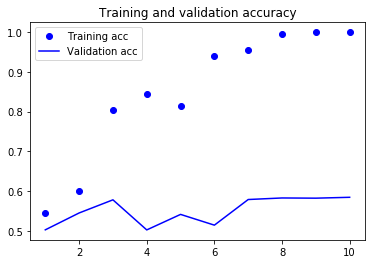

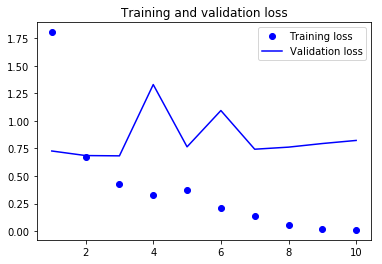

In [26]:
def plotAccAndLoss():
    import matplotlib.pyplot as plt

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
plotAccAndLoss()

モデルがすぐoverfittingしてしまった。trainingサンプルが超少ないから。

6.16 Training the same model without pretrained word embeddings

In [27]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 7ms/step - loss: 0.6979 - acc: 0.4850 - val_loss: 0.6937 - val_acc: 0.5063
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4974 - a

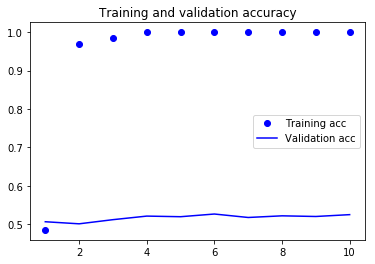

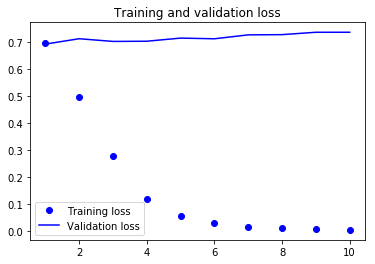

In [28]:
plotAccAndLoss()

比較してみると、pretrained embeddingsを使うモデルの方が、learned embeddingsのモデルより、少し良い結果ができている。でもtrainデータが多い場合、learned embeddingsの方がもっと良い結果を出せる。タスクと関係があるから。
## Tokenizing the data of the test set and evaluating the model on the test set

In [30]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

# ここでfit_on_textsはやっちゃダメ。
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [31]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 48us/step


[0.8471417387008667, 0.57076]